# Importing Libraries and modules #




In [1]:
# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 



In [2]:
# empty list for appending performance metric score 
model_result = []

def predict(ml_model, model_name):

    '''
    Pass the model and predict value. 
    Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
    Plotting confusion_matrix and roc_curve for test data.
    ''' 

    # model fitting
    model = ml_model.fit(X_train, y_train)

    # predicting value and probability
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]


    ''' Performance Metrics ''' 
    # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
    train_accuracy = accuracy_score(y_train, y_train_pred) 
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'train accuracy : {round(train_accuracy,3)}')
    print(f'test accuracy : {round(test_accuracy,3)}')

    # precision score  ---->  TP/(TP+FP)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    print(f'train precision : {round(train_precision,3)}')
    print(f'test precision : {round(test_precision,3)}')

    # recall score  ---->  TP/(TP+FN)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print(f'train recall : {round(train_recall,3)}')
    print(f'test recall : {round(test_recall,3)}')

    # f1 score  ---->  Harmonic Mean of Precision and Recall
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    print(f'train f1 : {round(train_f1,3)}')
    print(f'test f1 : {round(test_f1,3)}')

    # roc_auc score  ---->  It shows how well the model can differentiate between classes.
    train_roc_auc = roc_auc_score(y_train, y_train_prob)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    print(f'train roc_auc : {round(train_roc_auc,3)}')
    print(f'test roc_auc : {round(test_roc_auc,3)}')
    print('-'*80)

    # classification report
    print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
    print('-'*80)




    ''' plotting ROC curve '''
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    plt.plot(fpr,tpr, label=f'ROC - {model_name}')
    plt.plot([0,1], [0,1], '--')
    plt.title('ROC curve on Test data', weight='bold')
    plt.xlabel('False Positive Rate----->')
    plt.ylabel('True Positive Rate----->')
    plt.legend(loc=4)


    ''' actual value vs predicted value on test data'''
    d = {'y_actual':y_test, 'y_predict':y_test_pred}
    print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
    print('-'*80)


    # using the score from the performance metrics to create the final model_result.
    model_result.append({'model':model_name,
                         'train_accuracy':train_accuracy, 
                         'test_accuracy':test_accuracy, 
                         'train_precision':train_precision,
                         'test_precision':test_precision,
                         'train_recall':train_recall,
                         'test_recall':test_recall,
                         'train_f1':train_f1,
                         'test_f1':test_f1,
                         'train_roc_auc':train_roc_auc,
                         'test_roc_acc':test_roc_auc})

In [3]:
df = pd.read_csv("dataaa.csv")
df

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,None,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive
3,None,True,False,False,False,True,True,True,False,Positive
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...
24995,None,True,True,False,True,True,False,False,True,Positive
24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,None,True,True,False,False,True,True,False,False,Positive
24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


# Encoding

In [4]:
#Encoding

df['Systemic Illness'] = df['Systemic Illness'].map({'None':3, 'Fever':2, 'Swollen Lymph Nodes':1 , 'Muscle Aches and Pain':0})
df['Rectal Pain'] = df["Rectal Pain"].astype('int', errors='ignore')
df['Sore Throat'] = df['Sore Throat'].astype('int', errors='ignore')
df['Penile Oedema'] = df['Penile Oedema'].astype('int', errors='ignore')
df['Oral Lesions'] = df['Oral Lesions'].astype('int', errors='ignore')
df['Solitary Lesion'] = df['Solitary Lesion'].astype('int', errors='ignore')
df['Swollen Tonsils'] = df['Swollen Tonsils'].astype('int', errors='ignore')
df['HIV Infection'] = df['HIV Infection'].astype('int', errors='ignore')
df['Sexually Transmitted Infection'] = df['Sexually Transmitted Infection'].astype('int', errors='ignore')
df['MonkeyPox'] = df['MonkeyPox'].map({'Positive':1,'Negative':0})
df

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,3,0,1,1,1,0,1,0,0,0
1,2,1,0,1,1,0,0,1,0,1
2,2,0,1,1,0,0,0,1,0,1
3,3,1,0,0,0,1,1,1,0,1
4,1,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
24995,3,1,1,0,1,1,0,0,1,1
24996,2,0,1,1,0,1,1,1,1,1
24997,3,1,1,0,0,1,1,0,0,1
24998,1,0,1,0,1,1,1,0,0,0


<AxesSubplot:>

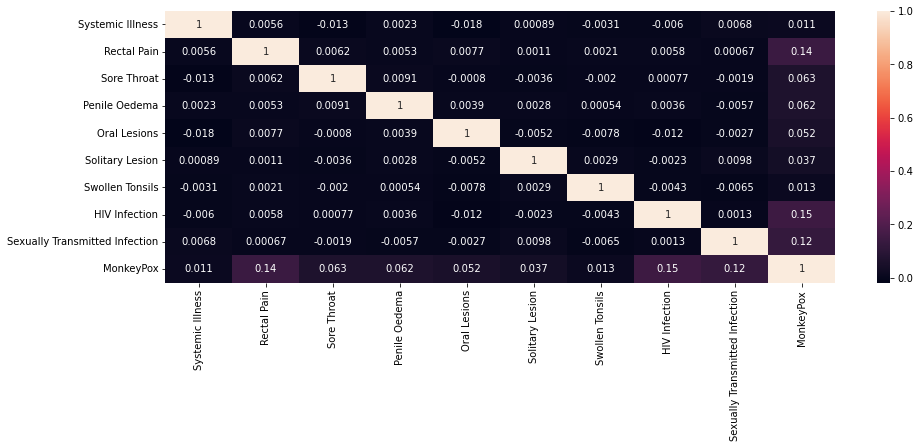

In [5]:
# Plotting correlation heatmap

plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)  

# Training

In [6]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(20000, 9)
(5000, 9)


In [7]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Without Feature Selection


train accuracy : 0.663
test accuracy : 0.675
train precision : 0.676
test precision : 0.691
train recall : 0.897
test recall : 0.901
train f1 : 0.771
test f1 : 0.782
train roc_auc : 0.655
test roc_auc : 0.656
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.58      0.26      0.36      1754
           1       0.69      0.90      0.78      3246

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.67      0.63      5000

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   1  0  0  1  1  1  1  1  1  1
y_predict  1  1  1  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


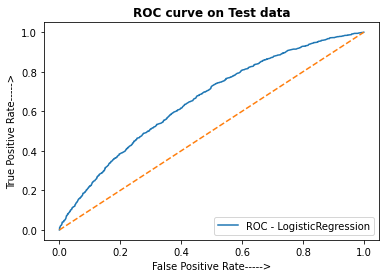

In [8]:
predict(LogisticRegression(), 'LogisticRegression')

# KNN Without Feature Selection

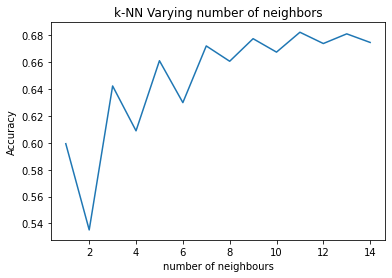

In [9]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 0.694
test accuracy : 0.682
train precision : 0.716
test precision : 0.72
train recall : 0.857
test recall : 0.835
train f1 : 0.78
test f1 : 0.774
train roc_auc : 0.713
test roc_auc : 0.665
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.57      0.40      0.47      1754
           1       0.72      0.84      0.77      3246

    accuracy                           0.68      5000
   macro avg       0.64      0.62      0.62      5000
weighted avg       0.67      0.68      0.67      5000

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   1  0  0  1  1  1  1  1  1  1
y_predict  0  1  1  1  1  1  1  1  0  1
--------------------------------------------------------------------------------


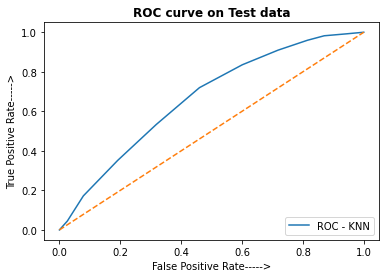

In [10]:
predict(KNeighborsClassifier(n_neighbors=11), "KNN")

# SVM Without Feature Selection

train accuracy : 0.693
test accuracy : 0.702
train precision : 0.695
test precision : 0.711
train recall : 0.919
test recall : 0.913
train f1 : 0.791
test f1 : 0.799
train roc_auc : 0.693
test roc_auc : 0.679
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.66      0.31      0.42      1754
           1       0.71      0.91      0.80      3246

    accuracy                           0.70      5000
   macro avg       0.68      0.61      0.61      5000
weighted avg       0.69      0.70      0.67      5000

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   1  0  0  1  1  1  1  1  1  1
y_predict  1  1  1  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


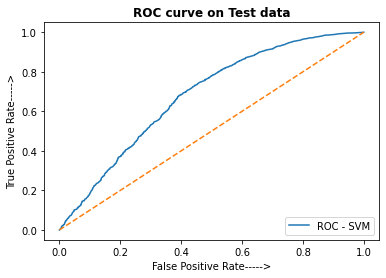

In [11]:
predict(SVC(probability=True), 'SVM')

# Decision Tree Without Feature Selection

train accuracy : 0.704
test accuracy : 0.688
train precision : 0.72
test precision : 0.72
train recall : 0.872
test recall : 0.851
train f1 : 0.789
test f1 : 0.78
train roc_auc : 0.738
test roc_auc : 0.674
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.58      0.39      0.47      1754
           1       0.72      0.85      0.78      3246

    accuracy                           0.69      5000
   macro avg       0.65      0.62      0.62      5000
weighted avg       0.67      0.69      0.67      5000

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   1  0  0  1  1  1  1  1  1  1
y_predict  0  1  1  1  1  1  1  1  0  1
--------------------------------------------------------------------------------


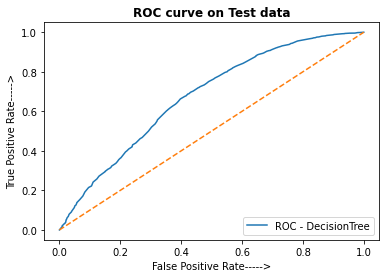

In [12]:
predict(DecisionTreeClassifier(), 'DecisionTree')

# Random Forest Without Feature Selection

train accuracy : 0.704
test accuracy : 0.691
train precision : 0.717
test precision : 0.719
train recall : 0.881
test recall : 0.86
train f1 : 0.79
test f1 : 0.783
train roc_auc : 0.737
test roc_auc : 0.674
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.59      0.38      0.46      1754
           1       0.72      0.86      0.78      3246

    accuracy                           0.69      5000
   macro avg       0.66      0.62      0.62      5000
weighted avg       0.67      0.69      0.67      5000

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   1  0  0  1  1  1  1  1  1  1
y_predict  0  1  1  1  1  1  1  1  0  1
--------------------------------------------------------------------------------


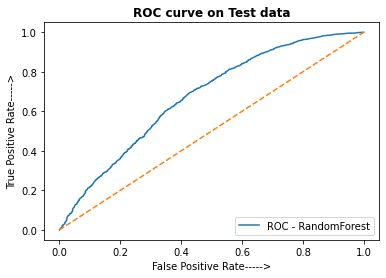

In [13]:
predict(RandomForestClassifier(), 'RandomForest')

# Ada Boost Without Feature Selection

train accuracy : 0.689
test accuracy : 0.697
train precision : 0.709
test precision : 0.725
train recall : 0.864
test recall : 0.86
train f1 : 0.778
test f1 : 0.787
train roc_auc : 0.698
test roc_auc : 0.708
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.60      0.40      0.48      1754
           1       0.72      0.86      0.79      3246

    accuracy                           0.70      5000
   macro avg       0.66      0.63      0.63      5000
weighted avg       0.68      0.70      0.68      5000

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   1  0  0  1  1  1  1  1  1  1
y_predict  0  1  0  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


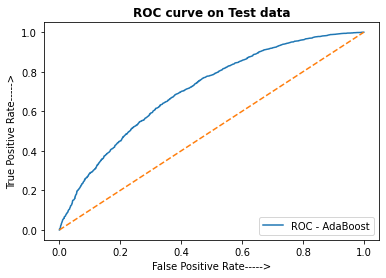

In [14]:
predict(AdaBoostClassifier(), 'AdaBoost')

# Gradient Boost Without Feature Selection

train accuracy : 0.693
test accuracy : 0.703
train precision : 0.706
test precision : 0.723
train recall : 0.881
test recall : 0.879
train f1 : 0.784
test f1 : 0.793
train roc_auc : 0.706
test roc_auc : 0.701
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.63      0.38      0.47      1754
           1       0.72      0.88      0.79      3246

    accuracy                           0.70      5000
   macro avg       0.68      0.63      0.63      5000
weighted avg       0.69      0.70      0.68      5000

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   1  0  0  1  1  1  1  1  1  1
y_predict  0  1  0  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


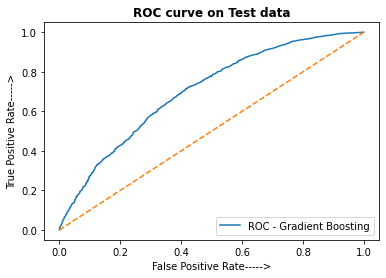

In [15]:
predict(GradientBoostingClassifier(learning_rate=0.6, random_state=95),'Gradient Boosting')

# Naive Bayes Without Feature Selection

train accuracy : 0.675
test accuracy : 0.69
train precision : 0.684
test precision : 0.701
train recall : 0.907
test recall : 0.91
train f1 : 0.78
test f1 : 0.792
train roc_auc : 0.679
test roc_auc : 0.683
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.63      0.28      0.39      1754
           1       0.70      0.91      0.79      3246

    accuracy                           0.69      5000
   macro avg       0.67      0.60      0.59      5000
weighted avg       0.68      0.69      0.65      5000

--------------------------------------------------------------------------------
           0  1  2  3  4  5  6  7  8  9
y_actual   1  0  0  1  1  1  1  1  1  1
y_predict  1  1  1  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


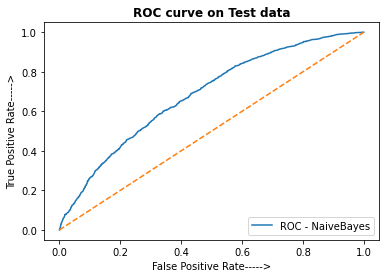

In [16]:
predict(GaussianNB(), 'NaiveBayes')

# Result before the Feature Selection

In [17]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_acc
0,LogisticRegression,0.663,0.675,0.676,0.691,0.897,0.901,0.771,0.782,0.655,0.656
1,KNN,0.694,0.682,0.716,0.720,0.857,0.835,0.780,0.774,0.713,0.665
2,SVM,0.693,0.702,0.695,0.711,0.919,0.913,0.791,0.799,0.693,0.679
3,DecisionTree,0.704,0.688,0.720,0.720,0.872,0.851,0.789,0.780,0.738,0.674
4,RandomForest,0.704,0.691,0.717,0.719,0.881,0.860,0.790,0.783,0.737,0.674
5,AdaBoost,0.689,0.697,0.709,0.725,0.864,0.860,0.778,0.787,0.698,0.708
6,Gradient Boosting,0.693,0.703,0.706,0.723,0.881,0.879,0.784,0.793,0.706,0.701
7,NaiveBayes,0.675,0.690,0.684,0.701,0.907,0.910,0.780,0.792,0.679,0.683


# Bar Graph 


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'DecisionTree'),
  Text(4, 0, 'RandomForest'),
  Text(5, 0, 'AdaBoost'),
  Text(6, 0, 'GradientBoosting'),
  Text(7, 0, 'NaiveBayes')])

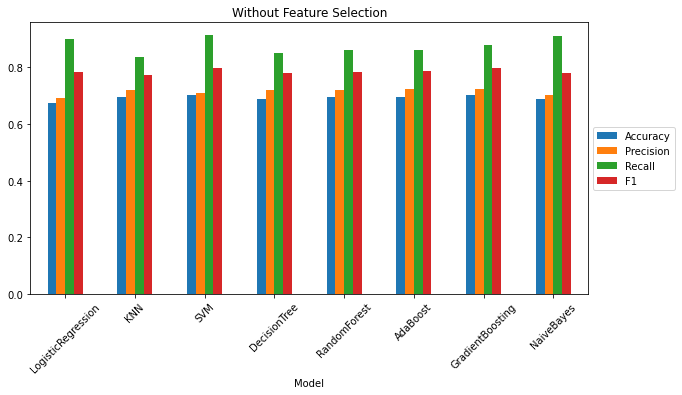

In [18]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
  
# create data
dff = pd.DataFrame([['LogisticRegression', 0.675, 0.691, 0.901, 0.782], ['KNN', 0.694, 0.720, 0.835, 0.774], ['SVM', 0.704, 0.711, 0.913, 0.799],
                   ['DecisionTree', 0.688, 0.720, 0.851, 0.780], ['RandomForest', 0.695, 0.719, 0.861, 0.782], ['AdaBoost', 0.694, 0.725, 0.86, 0.787], ['GradientBoosting', 0.704, 0.723, 0.879, 0.799],
                   ['NaiveBayes', 0.69, 0.701, 0.91, 0.780]],
                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

  

dff.plot(x='Model', kind='bar', stacked=False,title='Without Feature Selection', figsize = (10,5))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
         
plt.xticks(rotation=45)


# Feature Selection

In [19]:
X1 = pd.DataFrame(X, columns=['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection'])

# Dropping Attributes

In [20]:
df1 = df.drop(['Swollen Tonsils','Sore Throat'],axis =1)
df1

,Systemic Illness,Rectal Pain,Penile Oedema,Oral Lesions,Solitary Lesion,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,3,0,1,1,0,0,0,0
1,2,1,1,1,0,1,0,1
2,2,0,1,0,0,1,0,1
3,3,1,0,0,1,1,0,1
4,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
24995,3,1,0,1,1,0,1,1
24996,2,0,1,0,1,1,1,1
24997,3,1,0,0,1,0,0,1
24998,1,0,0,1,1,0,0,0


# Training the new model

In [21]:
X1 = df1.iloc[:, :-1].values 
y1 = df1.iloc[:, -1].values 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print(X1_train.shape)
print(X1_test.shape)

(20000, 7)
(5000, 7)


In [22]:
model_result = []

def predictt(ml_model, model_name):

    '''
    Pass the model and predict value. 
    Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
    Plotting confusion_matrix and roc_curve for test data.
    ''' 

    # model fitting
    model = ml_model.fit(X1_train, y1_train)

    # predicting value and probability
    y1_train_pred = model.predict(X1_train)
    y1_test_pred = model.predict(X1_test)
    y1_train_prob = model.predict_proba(X1_train)[:,1]
    y1_test_prob = model.predict_proba(X1_test)[:,1]


    ''' Performance Metrics ''' 
    # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
    train_accuracy = accuracy_score(y1_train, y1_train_pred) 
    test_accuracy = accuracy_score(y1_test, y1_test_pred)
    print(f'train accuracy : {round(train_accuracy,3)}')
    print(f'test accuracy : {round(test_accuracy,3)}')

    # precision score  ---->  TP/(TP+FP)
    train_precision = precision_score(y1_train, y1_train_pred)
    test_precision = precision_score(y1_test, y1_test_pred)
    print(f'train precision : {round(train_precision,3)}')
    print(f'test precision : {round(test_precision,3)}')

    # recall score  ---->  TP/(TP+FN)
    train_recall = recall_score(y1_train, y1_train_pred)
    test_recall = recall_score(y1_test, y1_test_pred)
    print(f'train recall : {round(train_recall,3)}')
    print(f'test recall : {round(test_recall,3)}')

    # f1 score  ---->  Harmonic Mean of Precision and Recall
    train_f1 = f1_score(y1_train, y1_train_pred)
    test_f1 = f1_score(y1_test, y1_test_pred)
    print(f'train f1 : {round(train_f1,3)}')
    print(f'test f1 : {round(test_f1,3)}')

    # roc_auc score  ---->  It shows how well the model can differentiate between classes.
    train_roc_auc = roc_auc_score(y1_train, y1_train_prob)
    test_roc_auc = roc_auc_score(y1_test, y1_test_prob)
    print(f'train roc_auc : {round(train_roc_auc,3)}')
    print(f'test roc_auc : {round(test_roc_auc,3)}')
    print('-'*80)

    # classification report
    print(f'classification report for test data \n{classification_report(y1_test, y1_test_pred)}')
    print('-'*80)




    ''' plotting ROC curve '''
    fpr, tpr, threshold = roc_curve(y1_test, y1_test_prob)
    plt.plot(fpr,tpr, label=f'ROC - {model_name}')
    plt.plot([0,1], [0,1], '--')
    plt.title('ROC curve on Test data', weight='bold')
    plt.xlabel('False Positive Rate----->')
    plt.ylabel('True Positive Rate----->')
    plt.legend(loc=4)


    ''' actual value vs predicted value on test data'''
    d = {'y1_actual':y1_test, 'y1_predict':y1_test_pred}
    print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
    print('-'*80)


    # using the score from the performance metrics to create the final model_result.
    model_result.append({'model':model_name,
                         'train_accuracy':train_accuracy, 
                         'test_accuracy':test_accuracy, 
                         'train_precision':train_precision,
                         'test_precision':test_precision,
                         'train_recall':train_recall,
                         'test_recall':test_recall,
                         'train_f1':train_f1,
                         'test_f1':test_f1,
                         'train_roc_auc':train_roc_auc,
                         'test_roc_acc':test_roc_auc})

# Logistic Regression After Feature Selection

train accuracy : 0.661
test accuracy : 0.675
train precision : 0.674
test precision : 0.69
train recall : 0.901
test recall : 0.906
train f1 : 0.771
test f1 : 0.783
train roc_auc : 0.65
test roc_auc : 0.65
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.59      0.25      0.35      1754
           1       0.69      0.91      0.78      3246

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.67      0.63      5000

--------------------------------------------------------------------------------
            0  1  2  3  4  5  6  7  8  9
y1_actual   1  0  0  1  1  1  1  1  1  1
y1_predict  1  1  1  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


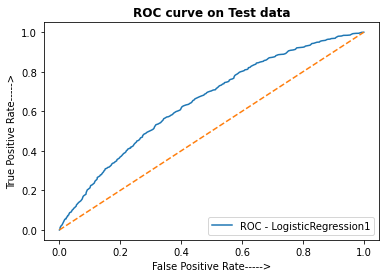

In [23]:
predictt(LogisticRegression(), 'LogisticRegression1')

# KNN After Feature Selection

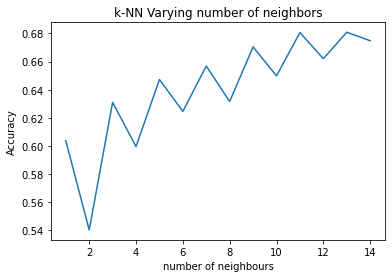

In [24]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train,y1_train)
    accuracy.append(knn.score(X1_test, y1_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 0.673
test accuracy : 0.681
train precision : 0.699
test precision : 0.714
train recall : 0.851
test recall : 0.848
train f1 : 0.768
test f1 : 0.775
train roc_auc : 0.672
test roc_auc : 0.658
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.57      0.37      0.45      1754
           1       0.71      0.85      0.78      3246

    accuracy                           0.68      5000
   macro avg       0.64      0.61      0.61      5000
weighted avg       0.66      0.68      0.66      5000

--------------------------------------------------------------------------------
            0  1  2  3  4  5  6  7  8  9
y1_actual   1  0  0  1  1  1  1  1  1  1
y1_predict  1  1  1  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


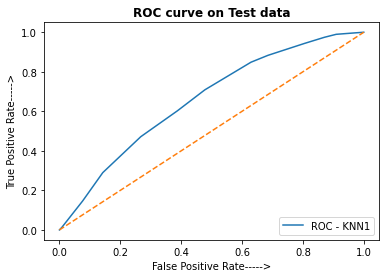

In [25]:
predictt(KNeighborsClassifier(n_neighbors=13), "KNN1")

# SVM After Feature Selection 

train accuracy : 0.685
test accuracy : 0.699
train precision : 0.69
test precision : 0.709
train recall : 0.911
test recall : 0.911
train f1 : 0.786
test f1 : 0.797
train roc_auc : 0.661
test roc_auc : 0.665
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.65      0.31      0.42      1754
           1       0.71      0.91      0.80      3246

    accuracy                           0.70      5000
   macro avg       0.68      0.61      0.61      5000
weighted avg       0.69      0.70      0.66      5000

--------------------------------------------------------------------------------
            0  1  2  3  4  5  6  7  8  9
y1_actual   1  0  0  1  1  1  1  1  1  1
y1_predict  1  1  0  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


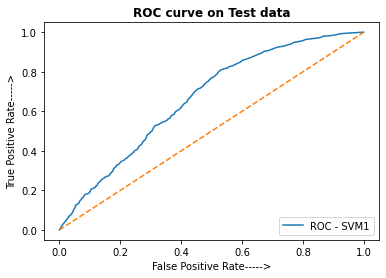

In [26]:
predictt(SVC(probability=True), 'SVM1')

# Decision Tree After Feature Selection

train accuracy : 0.69
test accuracy : 0.701
train precision : 0.702
test precision : 0.719
train recall : 0.884
test recall : 0.884
train f1 : 0.783
test f1 : 0.793
train roc_auc : 0.706
test roc_auc : 0.695
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.63      0.36      0.46      1754
           1       0.72      0.88      0.79      3246

    accuracy                           0.70      5000
   macro avg       0.67      0.62      0.63      5000
weighted avg       0.69      0.70      0.68      5000

--------------------------------------------------------------------------------
            0  1  2  3  4  5  6  7  8  9
y1_actual   1  0  0  1  1  1  1  1  1  1
y1_predict  1  1  0  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


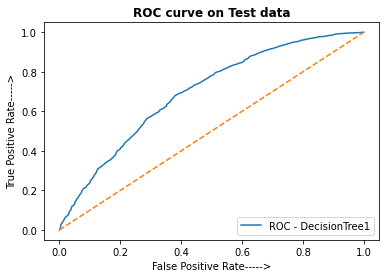

In [27]:
predictt(DecisionTreeClassifier(), 'DecisionTree1')

# Random Forest After Feature Selection

train accuracy : 0.69
test accuracy : 0.701
train precision : 0.701
test precision : 0.717
train recall : 0.89
test recall : 0.892
train f1 : 0.784
test f1 : 0.795
train roc_auc : 0.706
test roc_auc : 0.694
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.64      0.35      0.45      1754
           1       0.72      0.89      0.80      3246

    accuracy                           0.70      5000
   macro avg       0.68      0.62      0.62      5000
weighted avg       0.69      0.70      0.67      5000

--------------------------------------------------------------------------------
            0  1  2  3  4  5  6  7  8  9
y1_actual   1  0  0  1  1  1  1  1  1  1
y1_predict  1  1  0  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


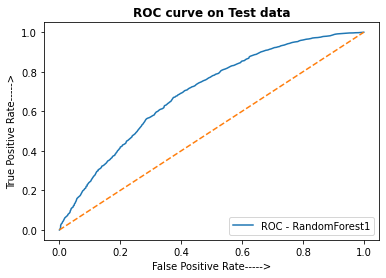

In [28]:
predictt(RandomForestClassifier(), 'RandomForest1')

# Ada Boost After Feature Selection

train accuracy : 0.686
test accuracy : 0.699
train precision : 0.706
test precision : 0.724
train recall : 0.864
test recall : 0.868
train f1 : 0.777
test f1 : 0.789
train roc_auc : 0.695
test roc_auc : 0.703
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.61      0.39      0.47      1754
           1       0.72      0.87      0.79      3246

    accuracy                           0.70      5000
   macro avg       0.67      0.63      0.63      5000
weighted avg       0.68      0.70      0.68      5000

--------------------------------------------------------------------------------
            0  1  2  3  4  5  6  7  8  9
y1_actual   1  0  0  1  1  1  1  1  1  1
y1_predict  1  1  0  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


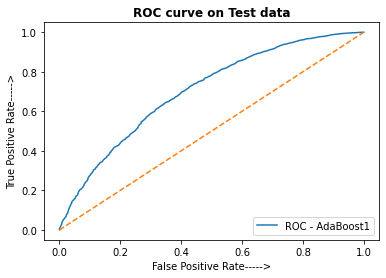

In [29]:
predictt(AdaBoostClassifier(), 'AdaBoost1')

# Gradient Boost After Feature Selection

train accuracy : 0.687
test accuracy : 0.701
train precision : 0.701
test precision : 0.719
train recall : 0.882
test recall : 0.884
train f1 : 0.781
test f1 : 0.793
train roc_auc : 0.7
test roc_auc : 0.699
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.63      0.36      0.46      1754
           1       0.72      0.88      0.79      3246

    accuracy                           0.70      5000
   macro avg       0.67      0.62      0.63      5000
weighted avg       0.69      0.70      0.68      5000

--------------------------------------------------------------------------------
            0  1  2  3  4  5  6  7  8  9
y1_actual   1  0  0  1  1  1  1  1  1  1
y1_predict  1  1  0  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


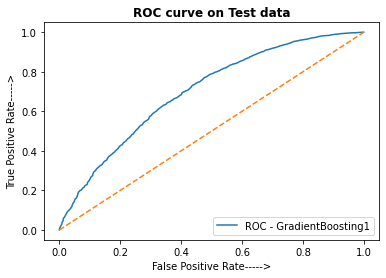

In [30]:
predictt(GradientBoostingClassifier(learning_rate=0.6, random_state=95),'GradientBoosting1')

# Naive Bayes After Feature Selection 

train accuracy : 0.674
test accuracy : 0.688
train precision : 0.682
test precision : 0.699
train recall : 0.911
test recall : 0.913
train f1 : 0.78
test f1 : 0.792
train roc_auc : 0.675
test roc_auc : 0.678
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.63      0.27      0.38      1754
           1       0.70      0.91      0.79      3246

    accuracy                           0.69      5000
   macro avg       0.66      0.59      0.59      5000
weighted avg       0.67      0.69      0.65      5000

--------------------------------------------------------------------------------
            0  1  2  3  4  5  6  7  8  9
y1_actual   1  0  0  1  1  1  1  1  1  1
y1_predict  1  1  1  1  1  1  1  1  1  1
--------------------------------------------------------------------------------


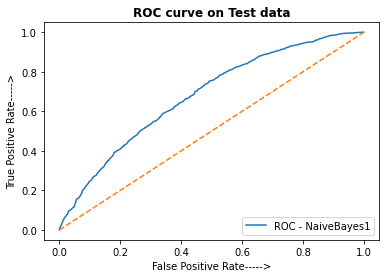

In [31]:
predictt(GaussianNB(), 'NaiveBayes1')

# Result After Feature Selection

In [33]:
model_result1 = pd.DataFrame(model_result)
round(model_result1,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_acc
0,LogisticRegression1,0.661,0.675,0.674,0.690,0.901,0.906,0.771,0.783,0.650,0.650
1,KNN1,0.673,0.681,0.699,0.714,0.851,0.848,0.768,0.775,0.672,0.658
2,SVM1,0.685,0.699,0.690,0.709,0.911,0.911,0.786,0.797,0.661,0.665
3,DecisionTree1,0.690,0.701,0.702,0.719,0.884,0.884,0.783,0.793,0.706,0.695
4,RandomForest1,0.690,0.701,0.701,0.717,0.890,0.892,0.784,0.795,0.706,0.694
5,AdaBoost1,0.686,0.699,0.706,0.724,0.864,0.868,0.777,0.789,0.695,0.703
6,GradientBoosting1,0.687,0.701,0.701,0.719,0.882,0.884,0.781,0.793,0.700,0.699
7,NaiveBayes1,0.674,0.688,0.682,0.699,0.911,0.913,0.780,0.792,0.675,0.678


# Bar Graph

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'DecisionTree'),
  Text(4, 0, 'RandomForest'),
  Text(5, 0, 'AdaBoost'),
  Text(6, 0, 'GradientBoosting'),
  Text(7, 0, 'NaiveBayes')])

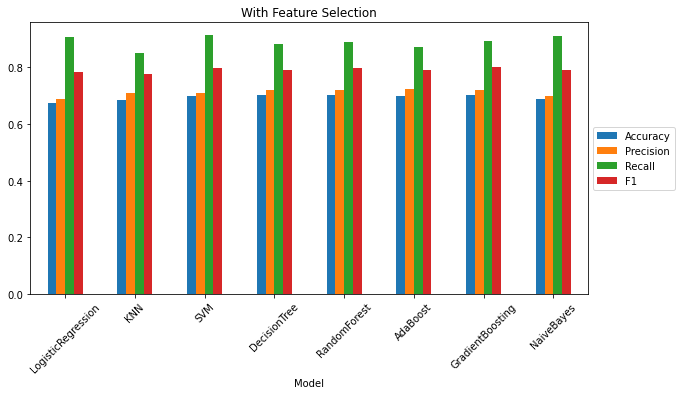

In [34]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
  
# create data
dfff = pd.DataFrame([['LogisticRegression', 0.675, 0.690, 0.906, 0.783], ['KNN', 0.684, 0.710, 0.850, 0.775], ['SVM', 0.699, 0.709, 0.913, 0.799],
                   ['DecisionTree', 0.701, 0.720, 0.884, 0.790], ['RandomForest', 0.701, 0.719, 0.890, 0.799], ['AdaBoost', 0.699, 0.725, 0.87, 0.79], ['GradientBoosting', 0.704, 0.719, 0.894, 0.800],
                   ['NaiveBayes', 0.690, 0.699, 0.91, 0.792]],
                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

dfff.plot(x='Model',
        kind='bar',
        stacked=False,
        title='With Feature Selection',
        figsize = (10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
         
plt.xticks(rotation=45)
